Part 1: Digit recognition using CNNs


Code:

Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)
Training data reshaped: (60000, 28, 28, 1), Labels: (60000, 10)
Test data reshaped: (10000, 28, 28, 1), Labels: (10000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,522 (3.42 MB)

 Trainable params: 896,522 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 251ms/step - accuracy: 0.8605 - loss: 0.4413 - val_accuracy: 0.9868 - val_loss: 0.0420
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 254ms/step - accuracy: 0.9803 - loss: 0.0677 - val_accuracy: 0.9885 - val_loss: 0.0346
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 248ms/step - accuracy: 0.9855 - loss: 0.0462 - val_accuracy: 0.9903 - val_loss: 0.0283
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 248ms/step - accuracy: 0.9883 - loss: 0.0403 - val_accuracy: 0.9912 - val_loss: 0.0276
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 116s 248ms/step - accuracy: 0.9906 - loss: 0.0306 - val_accuracy: 0.9913 - val_loss: 0.0251
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 246ms/step - accuracy: 0.9920 - loss: 0.0239 - val_accuracy: 0.9913 - val_loss: 0.0233
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 117s 250ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9929 - val_loss: 0.0222
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 246ms/step - accuracy: 0.9938 -

Training Accuracy: 0.9991
Test Accuracy: 0.9934


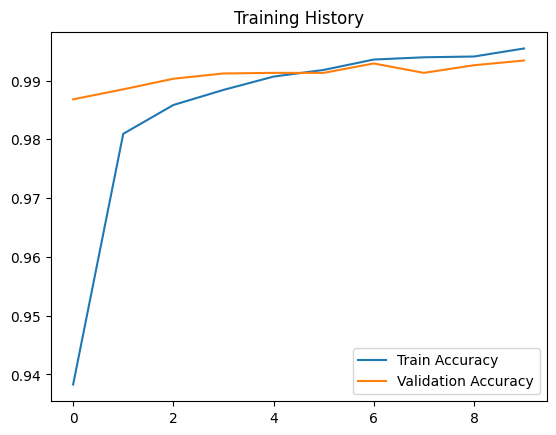

In [8]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model


(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(f"Training data reshaped: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data reshaped: {x_test.shape}, Labels: {y_test.shape}")

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
model.save('KANKINOU_SELONOU_GAUTIER_mnist_cnn_model.h5')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training History')
plt.savefig('KANKINNOU SELONOU GAUTIER Training History.png')

plt.show()

model = load_model('KANKINOU_SELONOU_GAUTIER_mnist_cnn_model.h5')

**Comments**:
. The graphs of training accuracy and validation accuracy are very imporant for unferstanding how well our model is learning and generalizing. According to this meaning and our training and validing graphs:

- Training and validation accuracies increase together and converge at a high value.

- There is no overfitting as the validation accuracy follows the trend of training accuracy and does not diverge or drop.
Good Fit:
- Both training and validation accuracies are high and closely aligned. This indicates a well-trained model with good generalization to validation data.
The plateau in validation accuracy suggests that further training is unlikely to improve the model.
-There is a saturation: The validation accuracy plateau suggests that the model has reached its maximum performance on this dataset.

-The validation accuracy starts high (close to 99%) and improves slightly over the epochs, plateauing at a level very close to the training accuracy.

- The training accuracy starts lower (around 94%) and steadily increases over the epochs, eventually approaching near 99.9%. This suggests the model is effectively learning patterns from the training data.

- Generalization: There is no significant gap between training and validation accuracies, indicating that the model is generalizing well to unseen data.



**Part** 2: Input optimization for a CNN

Code:

Iteration 0, Loss: 0.1956
Iteration 10, Loss: 0.1023
Iteration 20, Loss: 0.0538
Iteration 30, Loss: 0.0068
Iteration 40, Loss: 0.0008
Iteration 50, Loss: 0.0002
Iteration 60, Loss: 0.0001
Iteration 70, Loss: 0.0001
Iteration 80, Loss: 0.0001
Iteration 90, Loss: 0.0001


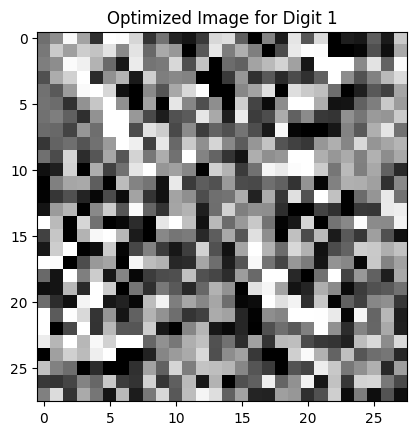

In [9]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.astype('float32') / 255.0  # Normalize pixel values
x_test = np.expand_dims(x_test, axis=-1)   # Add channel dimension (28, 28, 1)

model = load_model('KANKINOU_SELONOU_GAUTIER_mnist_cnn_model.h5')
target_output = np.zeros((1, 10))
target_output[0, 1] = 1
optimized_image = tf.Variable(np.random.rand(1, 28, 28, 1), dtype=tf.float32)
def loss_function():
    prediction = model(optimized_image)
    loss = tf.reduce_mean(tf.square(prediction - target_output))
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.01)
for i in range(100):  # Number of iterations
    with tf.GradientTape() as tape:
        loss = loss_function()
    gradients = tape.gradient(loss, [optimized_image])
    optimizer.apply_gradients(zip(gradients, [optimized_image]))
    optimized_image.assign(tf.clip_by_value(optimized_image, 0.0, 1.0))

    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {loss.numpy():.4f}")

plt.imshow(optimized_image.numpy().squeeze(), cmap='gray')
plt.title('Optimized Image for Digit 1')
plt.savefig('KANKINOU_SELONOU_GAUTIER_optimized_image.png')
plt.show()


. The optimization process modifies the input image's pixel values to maximize the model's confidence in predicting "1".

. The image represents the model's internal features that are most associated with the digit "1". The result aligns with the fact that CNNs learn features that may not always be directly interpretable to humans.

. The generated image might not be perfect, but it highlights how the model "sees" and interprets the features of digit "1".

. The optimized image visually resembles the digit "1" to some extent.

. Further experimentation with hyperparameters (learning rate, iterations)  might improve the image quality and reduce the loss further.

.The loss function decreased over iterations which indicates that the model's prediction is getting closer to the target output (digit "1").
